In [3]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import plotnine as p


### 4.0 Statistical Inference

In [7]:
# Yule data on correlation of public assistance on number of paupers

# read data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
def read_data(file): 
    return pd.read_stata("https://github.com/scunning1975/mixtape/raw/master/" + file)


yule = read_data('yule.dta')

In [8]:
res = sm.OLS.from_formula('paup ~ outrelief + old + pop', yule).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   paup   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     21.49
Date:                Wed, 01 May 2024   Prob (F-statistic):           2.00e-07
Time:                        03:15:46   Log-Likelihood:                -115.47
No. Observations:                  32   AIC:                             238.9
Df Residuals:                      28   BIC:                             244.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     63.1877     27.144      2.328      0.027       7.586     118.789
outrelief      0.7521      0.135      5.572      0.000       0.476       1.029
old            0.0556      0.223      0.249      0.805      -0.402       0.513
pop           -0.3107      0.067     -4.648      0.000      -0.448      -0.174
==============================================================================
Omnibus:                        7.594   Durbin-Watson:                   2.344
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                5.979
Skew:                           0.961   Prob(JB):                       0.0503
Kurtosis:                       3.888   Cond. No.                     2.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This might not be the best argument to say effect of outrelief is causal since we haven't controlled for all factors/ we haven't closed all the observed and unobserved backdoors

### 4.1 Physical Randomization

#### 4.1.1 Potential outcomes

Potential outcomes exist ex ante as a set of possibilities, but once a decision is made, all but one outcome disappears.

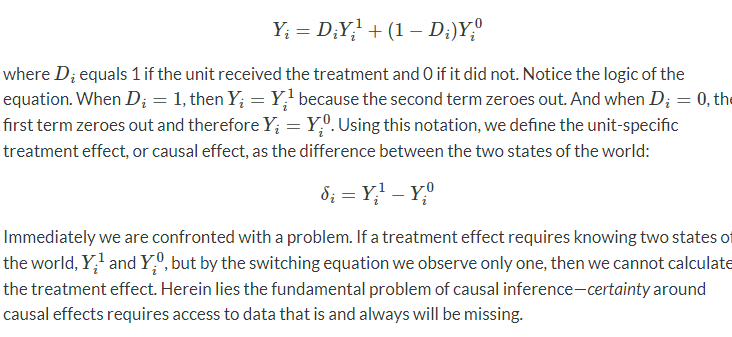

#### 4.1.2 Average treatment effects

Three important parameters for treatment effect

1. Average Treatment Effect (ATE)

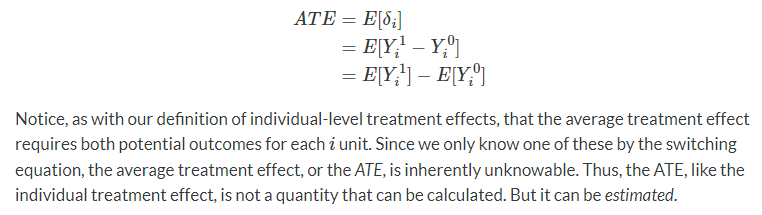

2. Average Treatment effect for Treatment group (ATT)

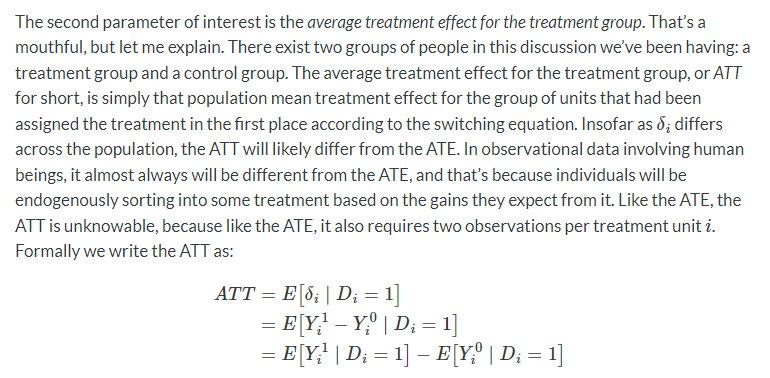

3. Average Treatment effect for Untreated group (ATU)

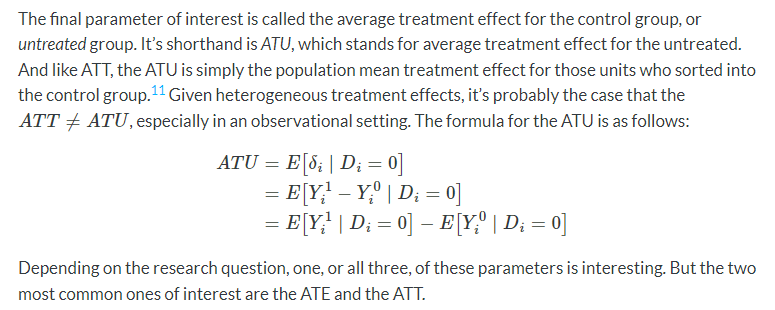

#### 4.1.3 Simple difference in means decomposition

Let's assume there are 10 patients $\iota$ who have cancer and two treatments. $D_{i}$ = 1 with surgery and $D_{i} = 0$ with chemotherapy

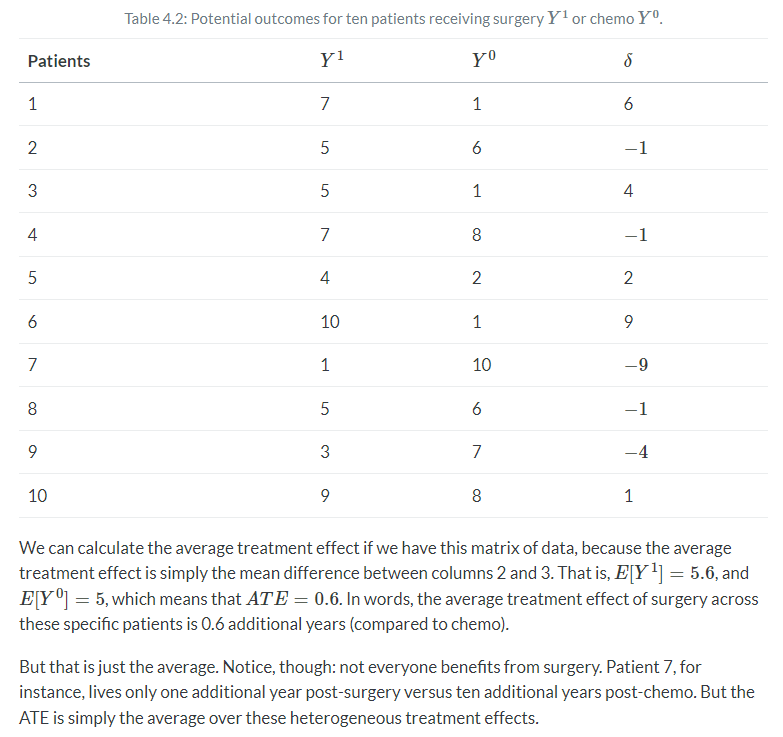


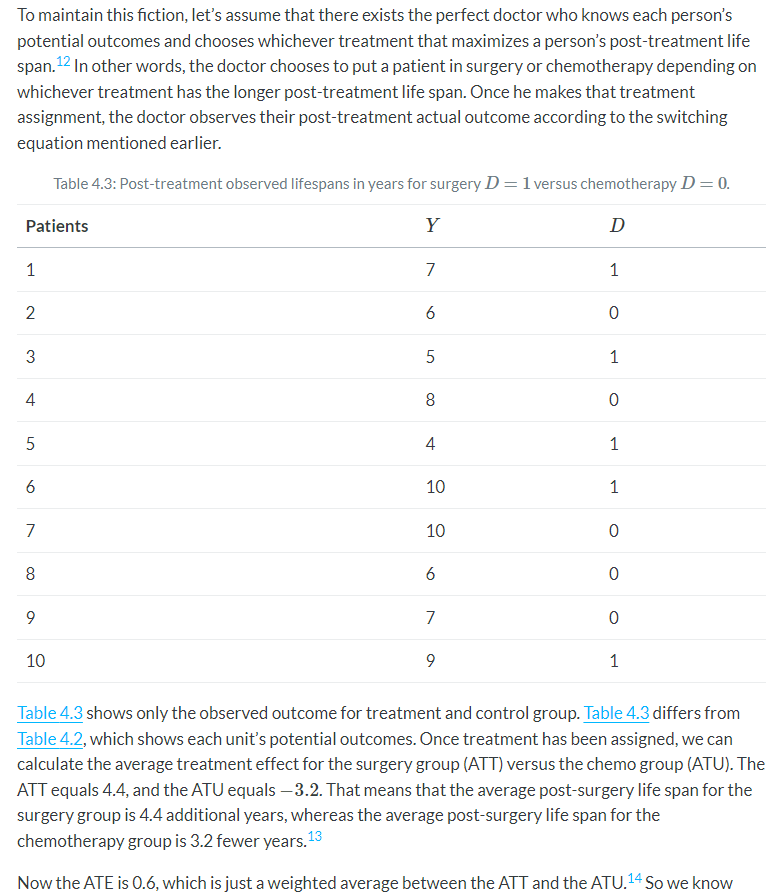

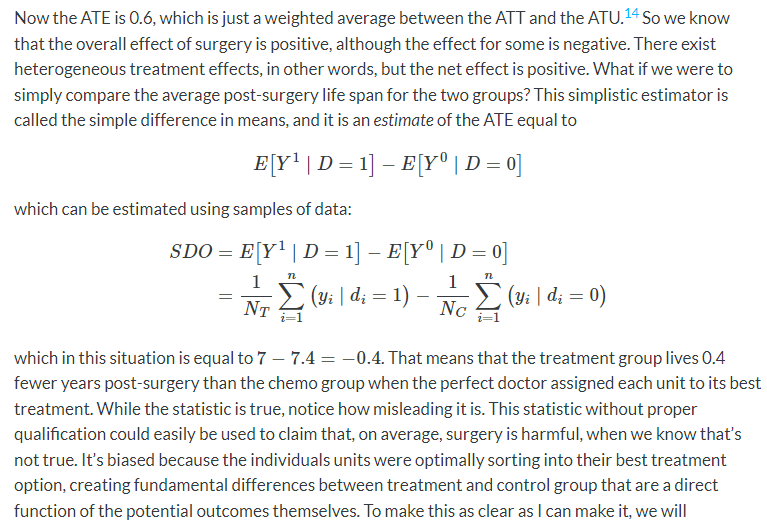

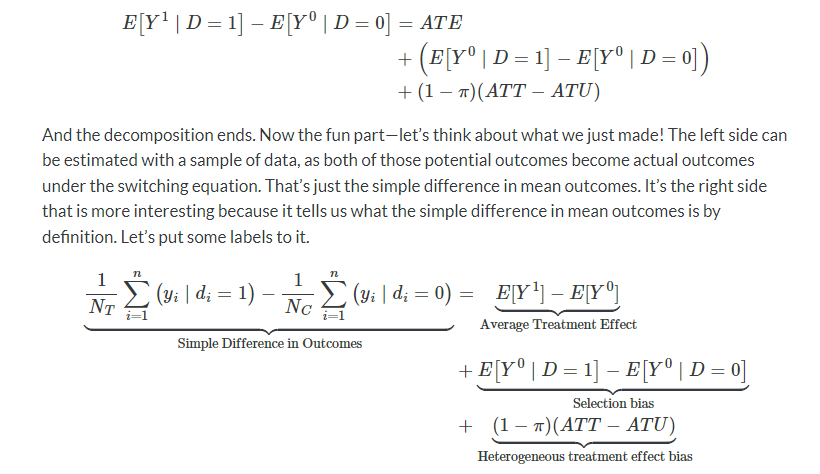

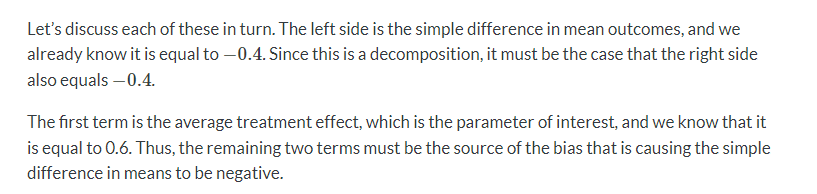

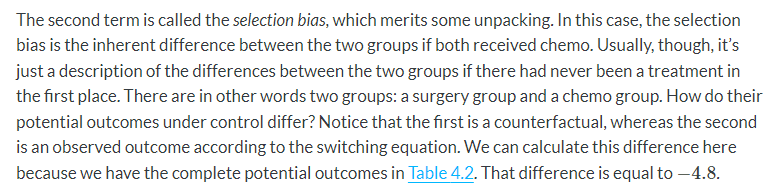

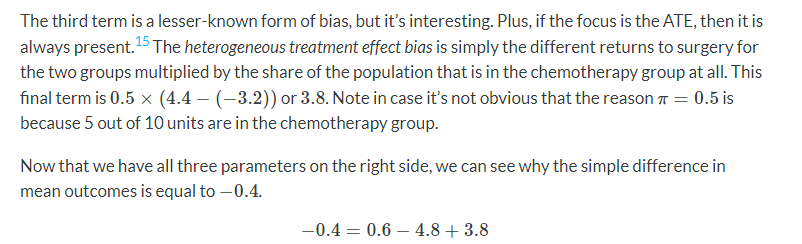

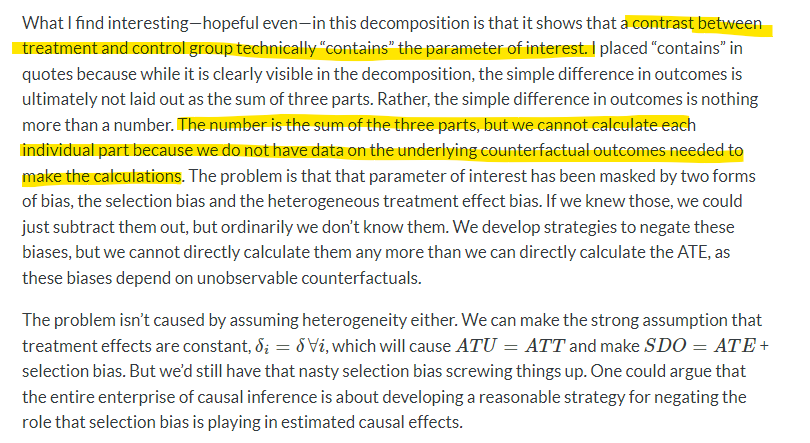

#### 4.1.4 Independence assumption

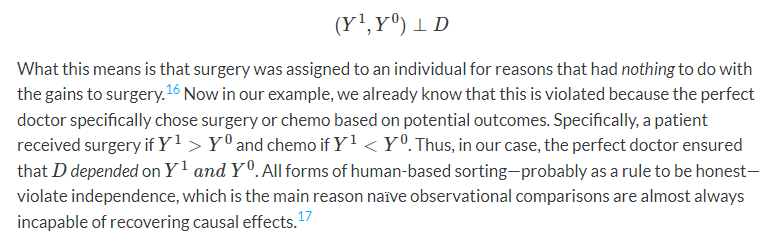

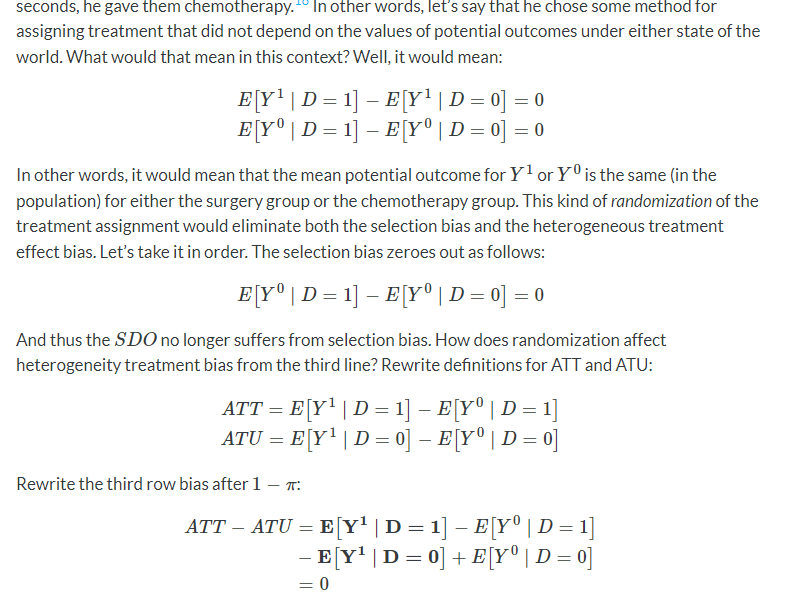

In [9]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import plotnine as p

# read data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
def read_data(file): 
    return pd.read_stata("https://github.com/scunning1975/mixtape/raw/master/" + file)



def gap():
    sdo = pd.DataFrame({
        'y1': (7, 5, 5, 7, 4, 10, 1, 5, 3, 9),
        'y0' : (1, 6, 1, 8, 2, 1, 10, 6, 7, 8),
        'random' : np.random.normal(size=10)})
    sdo.sort_values('random', inplace=True)
    sdo['d'] = [1,1,1,1,1,0,0,0,0,0]
    sdo['y'] = sdo['d']*sdo['y1'] + (1-sdo['d'])*sdo['y0']

    sdo = np.mean(sdo.y.values[0:5] - sdo.y.values[5:10])

    return sdo


sim = [gap() for x in range(1000)]
np.mean(sim)

0.5545999999999999

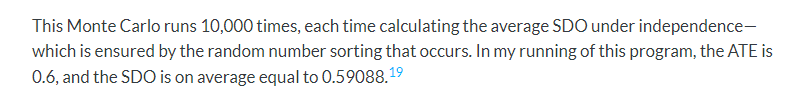

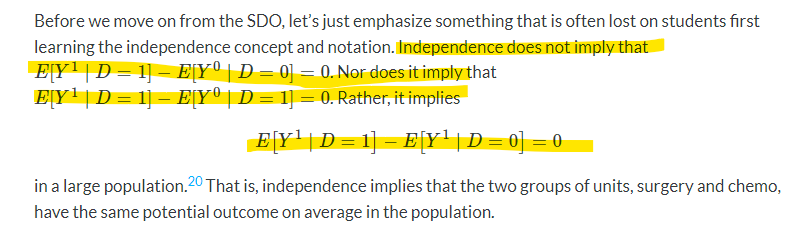

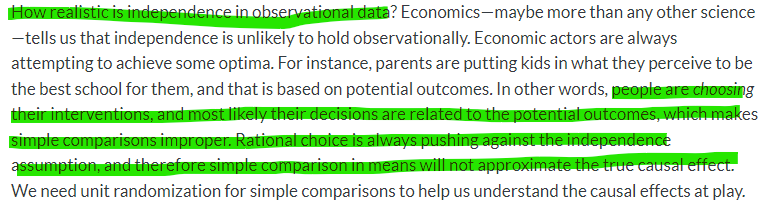

#### 4.1.5 SUTVA (Stable Unit Treatment Value Assumption)

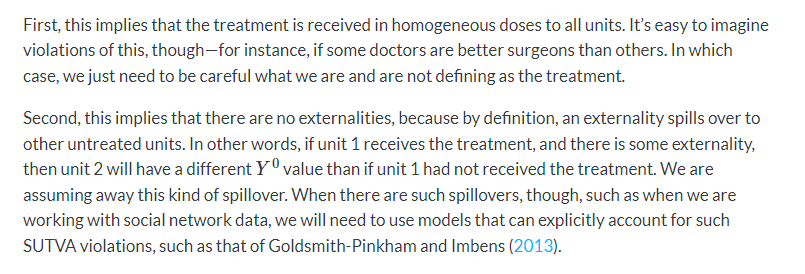